# Fundamentals 24
- Evaluation Metric

## 24-1. 들어가며
- 머신러닝 모델을 만드는데 있어 필수 작업 중 하나는 **성능 평가(evaluation)**
- 올바른 성능 평가가 이루어져야 정확하게 모델의 완성도를 측정
- 학습에 대한 평가를 끝내고 모델이 충분히 완성되었다고 판단    
- 각 머신러닝 문제는 서로 다른 **성능평가 척도(Evaluation Metric)**를 가짐
- 분류(Classification) 문제에서 **accuracy**만으로 모델의 성능을 평가하기에 충분하지 않음 -> **precision, racall** 그 외에 많은 평가 척도들이 존재

### 학습 목표
1. 머신러닝 학습 결과를 평가할 수 있다.
2. Precision과 Recall의 관계를 이해할 수 있다
3. AUC 영역을 통해 모델 간의 퍼포먼스를 비교할 수 있다.

---

## 24-2. Loss와 Metric
**Loss & Metric의 차이**
- Loss: 모델 학습시 **학습데이터(train data)**를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수
- Metric: 모델 학습 종료 후 **테스트데이터(test data)**를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수     

**[참고자료_Loss vs Accuracy]**     
https://kharshit.github.io/blog/2018/12/07/loss-vs-accuracy     

**Q. 위 글을 읽고 왜 Accuracy가 학습단계에 좋은 Loss가 될 수 없는지 본인의 표현으로 대답해 보세요.**      

A.      
 Discrete한 Accuracy는 Continuous한 Cross Entropy에 비해, 파라미터가 학습되어야 할 방향을 정확하게 제시하지 못한다. 비록 위 예시에서 1번 케이스는 Accuracy는 2번 케이스보다 낮았지만, Loss를 낮추는 쪽으로 더 학습이 진행되면 Accuracy도 높이면서 A, B, C간 확률분포의 차이(0.7-0.15)를 더욱 뚜렷하게 해서 결과적으로는 더 명확한 분류 기준을 학습한 모델이 될 여지가 있다.      
      
 Accuracy를 기준으로 학습이 진행된다면 2번 케이스는 이미 완벽한 Accuracy에 도달했으므로 더이상 정교한 학습이 이루어질 여지가 없어서(Accuracy가 loss가 된다면 loss=0) A, B, C간 확률분포의 차이(0.5-0.25)가 더 커지도록 학습이 진행되지 않을 것이다.   - 
     
     
- 분류모델의 성능 평가하는데 **Accuracy**가 더 우월한 **Metric**
- 궁극적으로 **Accuracy**가 높은 모델을 원하는 것임
- **BUT,** 모델의 정확성을 향상시켜 **Accuracy**가 높은 모델을 만들기 위해 활용하는 **Loss**로 **Cross Entropy**가 더욱 적당     
- 회귀모델 경우 **MRSE**가 **Loss & Metric** 양쪽으로 효과적으로 사용할 수 있음
- **Loss or Metric**으로 어떤 함수를 활용할지는 해결해야 할 Task에 따라 다름 
     
     


----


## 24-3. Confusion Matrix 와 Precision/Recall
**Confusion Matix**
     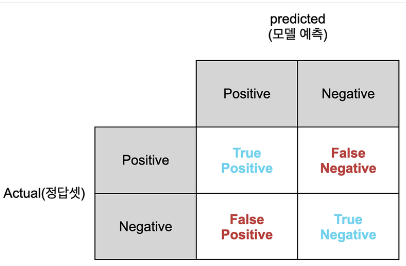
- True Positive (TP) - 모델이 양성(Positive)을 양성으로 맞혔을 때
- True Negative (TN) - 모델이 음성(Negative)을 음성으로 맞혔을 때
- False Positive (FP) - 모델이 음성(Negative)을 양성(Positive)으로 잘못 예측했을 때
- False Negative (FN) - 모델이 양성(Positive)을 음성(Negative)으로 잘못 예측했을 때       


- 분류 모델 측면의 **정확도(Accuracy)**: 전체 표본 중 **정확히 분류된 표본의 수**
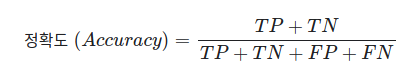

- 멀티클래스(Mlti-class)의 분류 결과를 하고 있다면 표본의 결과를 정답, 오답을 나누어 게산 가능
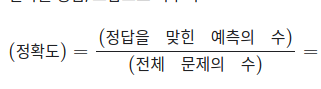

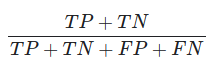

**Ex.** 
- 병원에 내원한 환자가 암인지 아닌지 구분하는 예측 모델 경우
- 100명의 환자 
<br/>   
- TP(실제로 암이면서, 암으로 예측한 결과) = 1
- TN(실제로 정상이고, 정상으로 예측한 결과) = 90
- FN(실제로 암이지만, 정상으로 예측한 결과) = 8
- FP(실제로 정상이지만, 암으로 예측한 결과) = 1

### Precision과 Recall 
- Precision: 정밀도
- Recall: 재현율 
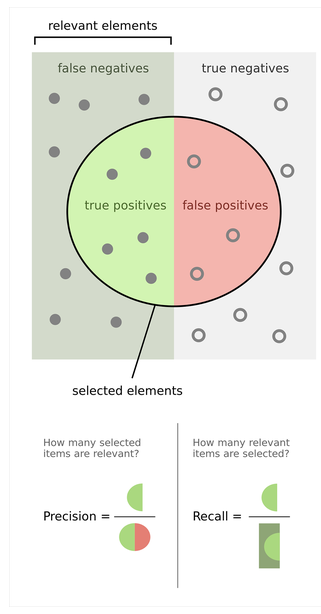

정확도(Accuracy) 대신 정밀도(Precisio) 
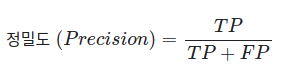
- 이 개념은 모델이 양성으로 규정한 것이 얼마나 정확한지 보는 것
- 모델이 음성으로 규정한 것에 관심 없음
- 정밀도가 높다는 건 FP(음성 모델을 양성으로 예측한 것)가 낮다는 것

=> 50%

재현율(Recall)
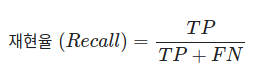
- 양성이 것들이 얼마나 모델에 의해 정확하게 탐지되었나를 보고 싶은 것
- 음성인 것을 양성으로 잘못 규정한 것에 대해 관심 없음 
- 재현율이 높다는 것은 FN이 낮다는 것
- 모델이 실제 양성을 분류해 내지 못한 경우가 적을 수록 재현율은 올라감    

=> 11%   
    
    
- 정확도가 91%이던 이 모델의 재현율은 11% -> 실제로 암 환자를 거의 못가려냄
- 정확도가 높아도 아주 쓸모없는 모델로 평가 됨
- **모델의 정확도가 매우 높게 나온 이유**: Confusion Matrix에서 보면 100개의 데이터중 대부분 TN에 몰려있고, 이 모델은 TN을 아주 정확하게 분류했기 때문에 정확도가 높은 것
    
**결론**    
- 음성 대 양성 데이터 분포가 불균형할 경우 정확도는 모델을 평가하는데 좋은 척도가 되지 못함

### F-score
- F1 score: Precision과 Recall의 조화평균이 되는 값
- Rrecision과 Recall 둘다 고려할 수 있어서 분류 모델의 훌륭한 척도가 됨
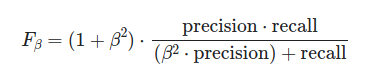   
    
**Q. 만약 Precision보다 Recall을 좀더 중요시하고 싶다면 F score에서 beta 값을 1보다 크게 하는게 좋을까요, 작게 하는게 좋을까요?**    
    
A.     
아래 경우를 가정해 봅시다.     
Case 1 : precision = 1, recall = 0.5     
Case 2 : precision = 0.5, recall = 1    
    
    
beta=1 이라면 F-score는 위 두 경우의 값이 동일합니다.        
beta=2 라면 분자는 동일하지만 Case 1의 분모가 더 커지므로 Case 2의 F score가 더 큽니다.        
이것은 beta가 1보다 클 때 recall이 더 큰 경우를 더 우대한다고 볼 수 있습니다.     
따라서, Recall을 중요시하고 싶다면 beta 값을 1보다 크게 하는 것이 좋습니다.

----


## 24-4. Threshold의 변화에 따른 모델 성능
- Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법
    - **PR(Precision and Recall) Curve**
    - **POC(Peceiver Operating Characteristic) Curve**

### 실습에서 사용할 데이터 준비
- 사이킷런에서 제공하는 붓꽃 데이터를 가져옴

In [2]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


### Task의 재구성
- 붗꽃 분류 예제는 상당히 간단하므로 그대로 훈련시키면 100% 가까운 성능 나옴
- 성능 평가 공부엔 적합하지 않음
- 데이터 잡음(noise = outlier)을 추가해서 성능을 낮춤
- 랜덤한 값으로 이루어진 **200 x n_features**, 800개의 컬럼을 매 데이터마다 추가

In [3]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.

(150, 804)


- 원래 붗꽃 데이터는 3가지 라벨로 나뉨
- 분석을 간단히 하기 위해 양성/음성 나뉘는 이진 분류(binary classificationn) 문제로 줄여 2개의 라벨 간 분류

In [4]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


### 모델 학습
- 2개의 라벨로 나뉜 데이터 가지고 **SVM(Support Vector Machine)**으로 모델 구성하여 학습 후 test 데이터를 넣어 정확도 확인

In [5]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

- **classifier.score()** 함수는 테스트 데이터에 대한 평균 정확도(Accuracy)를 리턴
- 0.5에 가까운 수준의 binary classifier은 성능이 거없다고 봐야함 
- **SVM**의 커널을 바꾸어봄

In [6]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

- 80% 정도의 정확도 나옴

In [7]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [10]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

- **classifier.predict()** 리턴값 & **y_test** 비교
- 모델 뒤에 Softmax가 있어 확률값을 출력하는 Logistic Regresiion모델과 달리, SVM에서 별로도 제공하는 **decision_function()**함수 존재
- 이 함수값은 (-1,1) 범위를 가지고 
- 0보다 작으면 음성(label=0)
- 0보다 크면 양성(label=1)

In [11]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


- **confusion_matrix**계산
- 실제 정답값 **y_test**와 **y_pred**을 비교한 결과
- **confusion_matrix**는 [[TP,FN], [FP,TN]]의 형태로 출력
- 사이킷런에서는 **classification_report** 함수를 통해 **confusion_matrix**에서 얻어진 **TP, FN, FP, TN** 값을 토대로 Precision, Recall, F1-score 등의 평가척도값으로 계산


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



- **decision_function** 값이 0보다 큰 것 -> 양성 분류

양성 분류 기준을 좀더 확대해서 -0.1보다 큰 것으로 양성으로 분류한다면?

In [13]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



- 양성 분류 기준 확대: Recall 0.77 -> 0.81 상승
- 전체적인 F1-score 0.8 -> 0.79 소폭 하락
- Task의 특성에 따라 이것이 오히려 더 좋은 결과를 가져올지도 모름

**Threshold** 값을 조금씩 바꿔보면서 평가척도값 변화 확인

In [14]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [15]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [16]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



## 24-5. Precision-Recall Curve

- PR(Precision-Recall) Curve는 X축: Recall, Y축: Precision 
- Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것

위 사례의 PR Curve 그리기

NameError: name 'average_precision' is not defined

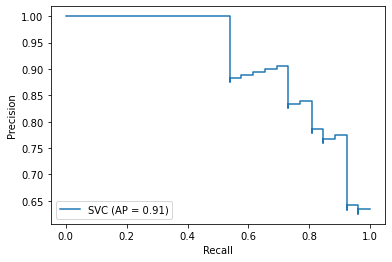

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

- 그래프를 보면 Precision과 Recall 사이의 트레이드오프 관계 확인
- Threshold값에 따라 Precision, Recall 값은 저 그래프 상 어딘가 됨
- Precisioin이든, Recall 이든 모두 1에 찍히면 (1,1) 이상적인 그래프지만 근접하도록 그리기    
      
      
- **AUC(Area Under Curve)**: Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로 위 PR Curve 아래 면적을 계산하는 방법
- 사이킷런에서 제공하는 **average_precision_score** 함수를 사용
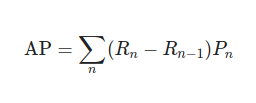
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html

- **average_precision_score(AP)** 값은 n값을 무한히 크게한다면 아주 작은 Recall 구간에 대해 Pn값을 적분하는 것과 같게 됨
- PR Curve 아래 면적인 **PR AUC**와 같은 의미
- **average_precision_score**와 **PR AUC**가 구현 측면에서 약간 다르지만 두 개념이 의미적으로 비슷하게 사용될 수 있음

In [18]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


- 모델을 바꿔 보면 값이 달라질 수 있음
- SVM의 커널을 'ploy'로 주었을 때 Accuracy가 매우 낮았음


**e.g.** SVM 커널의 종류
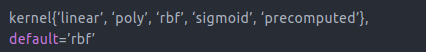

In [23]:
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

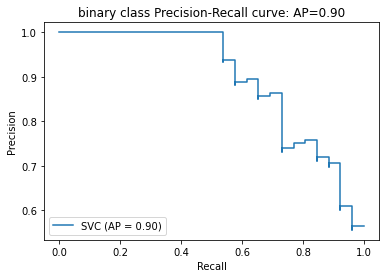

In [24]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### 24-6. ROC Curve
**ROC(Receiver Operating Characteristic) Curve**
- 수신자 조작 특성 곡선
- **Confusion Matrix** 수치 활용해 분류기의 분류 능력을 그래프로 표현
- Threshold 값의 변화에 따라 **Confusion matrix**에 생기는 변화로 인해 그려지는 것

### ROC 예시 Curve 
- ROC를 그리는 축인 TP Rate와 FP Rate은 Precision, Recall과 비슷해 보이지만 다른 개념

TP Rate & FP Rate 계산
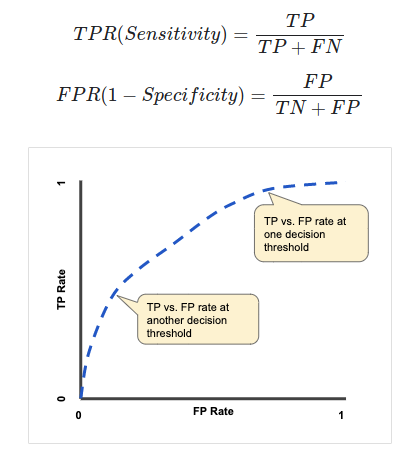

- 점선이 ROC
- TP Rate(TPR)의 수식은 Recall과 같음
- FP Rate(FPR): (1-Specificity)
- **Specificity**은 TN/(TN+FP) 이므로 음성 샘플에 대한 Recall

### AUC 예시 영역
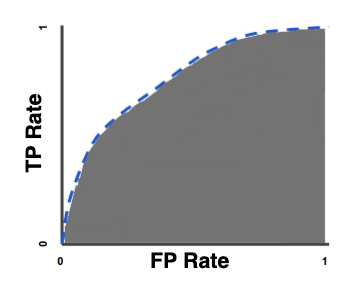
- **ROC AUC(Area Under the Roc Curve)** 넓이가 넓은 모델일수록 상대적을 좋은 성능을 보임
- PR Curve만큼 직관적으로 와닿지 않음

In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


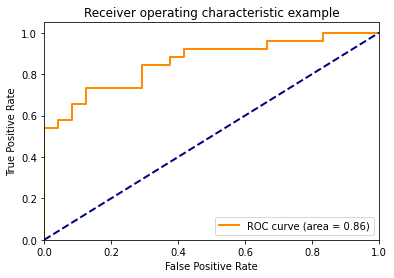

auc result:0.8605769230769231


In [30]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

- 아주 이상적인 Precision & Recall이 전부 1인 완벽한 모델은 (0,1)
- 양성과 음성에 대한 Recall이 모두 1 => TPR: 1, FPR: 0

**Ex.**
- 모델이 모든 샘플에 대해 양성 => (1,1)
- 모델이 모든 샘플에 대해 음성 => (0,0)
- 양성, 음성 무관하게 p의 확률로 양성 분류, 음성에 대한 Recall도 p => (p, 1-p)   
<br/>   
- 위 파란 점선은 극단적인 경우만 모아둔 경우
- 의미있는 분류기라면 파란 점선보다 위쪽에 그려져야함
- (0,1)에 가깝게 그려질수록 우수한 분류기
- 그러므로, ROC AUC가 클수록 상대적으로 좋은 모델이라 할 수 있음

- **ROC AUC** 값도 최대 1이 될 수 있음
- 위에서 0.86이 나왔음
- SVM 커널의 종류를 바꿔가며 ROC Curve그리고 ROC AUC값을 구하는 코드 작성

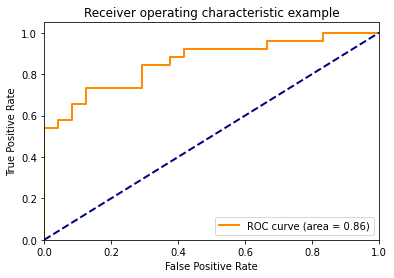

auc result:0.8605769230769231


In [27]:
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

----

## 24-7. 다양한 머신러닝 모델의 평가척도

### 회귀 모델의 평가척도
- loss function이 테스트셋에 적용될 때 그대로 Metric이 되는 경우가 대부분
- 회귀 모델의 경우 어떤 loss가 적합한지 그 특성을 알아보는 것이 중요

**[참고자료_회귀의 오류 지표 알아보기]**     
https://partrita.github.io/posts/regression-error/     
    
     
**Q. MSE, RMSE 등 square 계열 Metric과 MAE, MAPE 등 absolute value 계열 Metric이 특이값에 대해 어떤 차이를 보이는지 설명해 주세요.**    
   
  
A.      
MSE, RMSE는 오차의 제곱에 비례하여 수치가 늘어나므로, 특이값에 민감하게 반응하며, Outlier가 많은 데이터에 대해 모델이 강건(robust)하지 못하다.

 MAE, MAPE는 오차의 절대값에 비례해서 수치가 늘어나는데 상대적으로 특이값에 민감하지 않고 Outlier가 많은 데이터에 대해 강건한다.

### 랭킹 모델의 평가척도
- 추천시스템은 넓게 보면 정보 검색(Information Retrieval)과 같은 로직을 가짐
- 이런 모델들이 일반적인 분류 모델과 다른점은 **랭킹(우선순위)** 개념이 추가 됨
- User 입력 -> Item들이 추천할만한 여부 분류 X
- User 입력 -> 얼마나 추천할만 한지 랭킹까지 매겨야 하는 거 O

**[참고자료_정보 검색(Infomation Retrieval) 평가는 어떻게?]**     
https://lamttic.github.io/2020/03/20/01.html
    
     
**Q. NDCG가 MRR, MAP 등 이전 평가척도들에 비해 어떤 부분에서 좋아졌다고 할 수 있을까요?**    
   
  
A.      
랭킹을 매기기 위해 임의성을 배제하고 모든 콘텐츠 아이템에 대한 관련성을 계산하여 랭킹에 반영한다.

### 이미지 생성 모델의 평가척도
- 모델 평가: 정답과 모델의 예측치 사이의 거리 측정 방식

**[참고자료_Methods to Measure the Similarity Between Image]**     

    
     
**Q.  MSE나 PSNR 대비 SSIM이 가지는 가장 큰 차이점은 무엇인가요?**      
  
A.      
MSE나 PSNR은 모두 픽셀 단위로 비교해서 거리를 측정한다. 그러나 이 방식은 이미지가 약간 평행이동해 있어도 두 차이를 크게 측정하는 단점이 있다. SSIM은 이와 달리 픽셀 단위 비교보다는 이미지 내의 구조적 차이에 집중하는 방식을 쓴다.

### 기계번역 모델의 평가척도
- 텍스트 생성 모델 중 가장 대중적인 것: 기계번역 모델
- 영어를 한국어로 번역한 문장이 정답 한국어와 얼마나 비슷한지 어떻게 측정할것인지

**[참고자료_BLEU Score]**     

    
     
**Q. BLEU score는 결국 두 텍스트가 얼마나 겹치는지를 측정하는 척도입니다. BLEU에서는 텍스트가 겹치는 정도를 어떻게 측정하나요?**      
  
A.      
1-gram, 2-gram, 3-gram, 4-gram이 두 문장 사이에 몇번이나 공통되게 출현하는지를 측정합니다.